In [11]:
import numpy as np
import sympy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt

data=pd.read_csv('C:\\Users\\Utsav\\Desktop\\Projects\\Nuclear Property Prediction (EoS)\\case3.csv', sep=',',header=0)
data.head()

,e0,rho0,k0,q0,jo,l0,ksym0,nsmas,rmax,r14,lambda10,lambda14,lambda18,vs,qsym
0,-16.0000,0.1603,230.0006,299.9999,37.6838,82.6836,92.4610,2.1102,11.7035,13.3057,4237.3567,617.7569,100.8015,0.4700,531.8624
1,-15.9999,0.1598,229.9998,299.9997,34.7131,93.9064,99.3747,2.1061,11.8925,13.8104,5006.4893,688.9738,107.3561,0.4757,276.2796
2,-16.0001,0.1604,229.9992,299.9990,35.3709,97.8187,94.3493,2.0945,11.9287,13.9138,5082.7211,684.6785,104.4007,0.4774,241.9985
3,-16.0000,0.1598,230.0013,300.0015,36.3515,92.7971,88.2492,2.1016,11.8727,13.7309,4784.7250,660.3150,103.2706,0.4787,337.8591
4,-15.9998,0.1599,230.0004,300.0004,36.5467,86.2772,87.6960,2.1079,11.8034,13.4831,4468.3328,636.3053,102.1144,0.4800,431.2362


In [12]:
X = data.iloc[:,0:7]
X.head()

,e0,rho0,k0,q0,jo,l0,ksym0
0,-16.0000,0.1603,230.0006,299.9999,37.6838,82.6836,92.4610
1,-15.9999,0.1598,229.9998,299.9997,34.7131,93.9064,99.3747
2,-16.0001,0.1604,229.9992,299.9990,35.3709,97.8187,94.3493
3,-16.0000,0.1598,230.0013,300.0015,36.3515,92.7971,88.2492
4,-15.9998,0.1599,230.0004,300.0004,36.5467,86.2772,87.6960


In [13]:
y_nsmas = data.iloc[:, 7].values
y_rmax = data.iloc[:,8].values
y_r14 = data.iloc[:,9].values
y_lambda14 = data.iloc[:, 11].values
np.shape(X.values)

(2679, 7)

# Visualization

## Feature Pair Plots

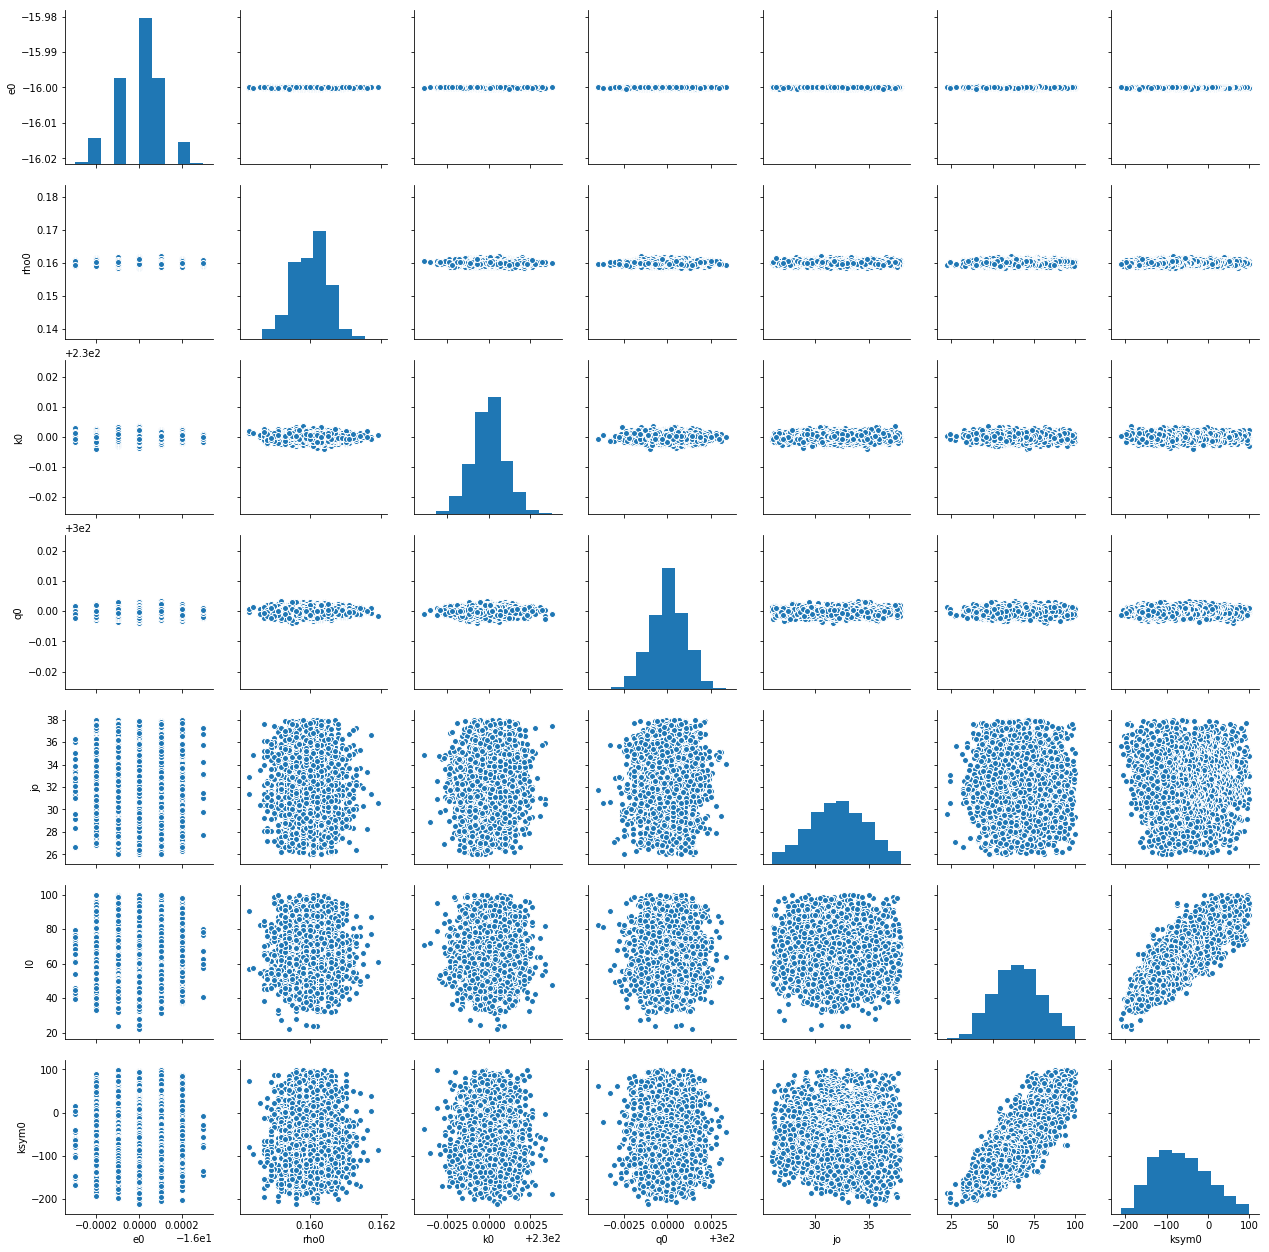

In [14]:
import seaborn as sns
sns.pairplot(X)

In [15]:
def random_forest(y_target):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X.values, y_target, test_size=0.3, random_state=1)
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error
    reg = RandomForestRegressor().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print("RMSE: %s" % (np.sqrt(mean_squared_error(y_test, y_pred))))
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()

# NSMAS

RMSE: 0.047757008184545084


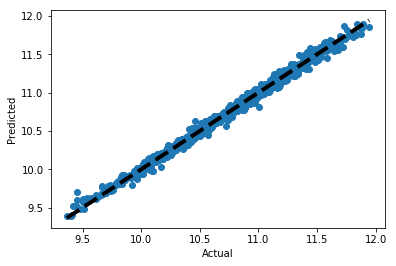

In [7]:
random_forest(y_nsmas)

# RMAX

RMSE: 0.03959984661053208


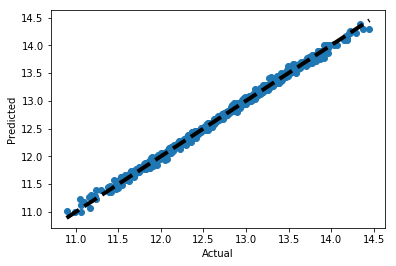

In [8]:
random_forest(y_rmax)

# R14

RMSE: 61.487975351705195


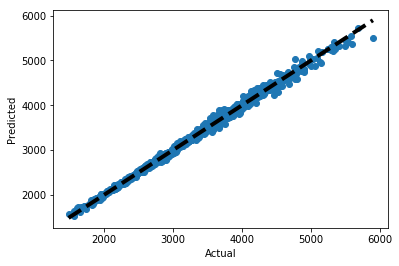

In [9]:
random_forest(y_r14)

# Lambda14

RMSE: 8.230000559688008


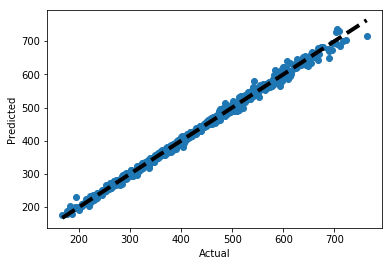

In [16]:
random_forest(y_lambda14)